In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
file_path = '/content/filtered_data.csv'
df = pd.read_csv(file_path)

In [ ]:
target_columns = [
    'Net Working Capital ( Incl. Def. Tax)', 'Debt-Equity Ratio', 'Long Term Debt-Equity Ratio',
    'Current Ratio', 'Interest Cover Ratio', 'ROCE (%)', 'PBIDTM (%)', 'PBITM (%)',
    'APATM (%)', 'RONW (%)', 'ROE (X)', 'EPS (annualised) (Unit Curr)', 'Net Sales',
    'Gross Sales', 'Value Of Output', 'Price to Book Value ( P/BV)', 'Price Earning (P/E)',
    'EV/EBIDTA', 'Market Cap/Sales', 'Book Value', 'Cash Flow From Operating Activities',
    'Total Income', 'Gross Profit'
]

In [ ]:
company_name = input("Enter Company Name: ")

Enter Company Name: 20 Microns


In [ ]:
company_data = df[df['Company Name'] == company_name].sort_values('Year')

# Select all years of data up to 2024
all_years_up_to_2024 = company_data[company_data['Year'] <= 2024]

In [ ]:
forecast_years = [2025, 2026, 2027]
forecast_results = {'Year': forecast_years}

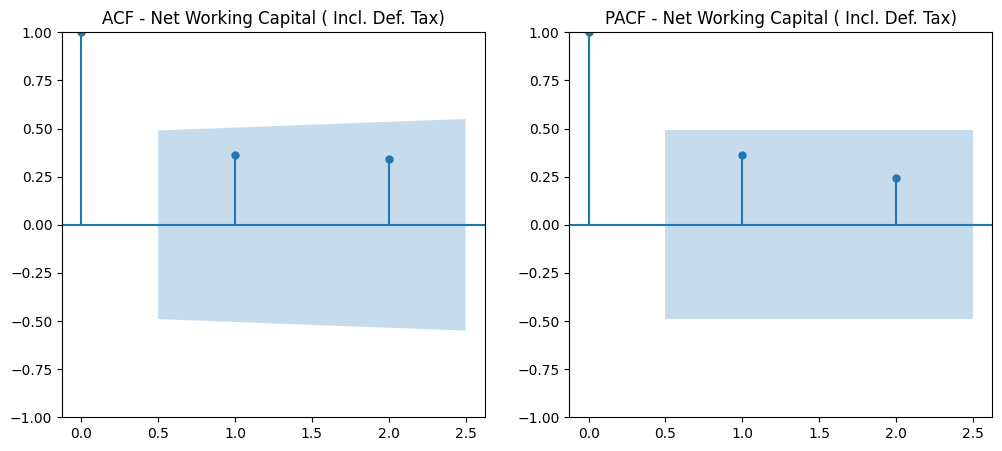

 ACF and PACF plots for 'Net Working Capital ( Incl. Def. Tax)' to select p, d, q.



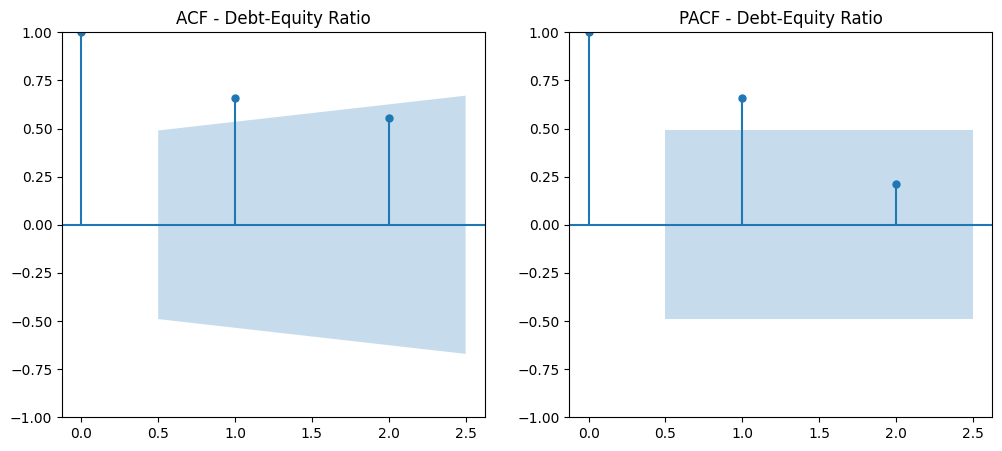

 ACF and PACF plots for 'Debt-Equity Ratio' to select p, d, q.



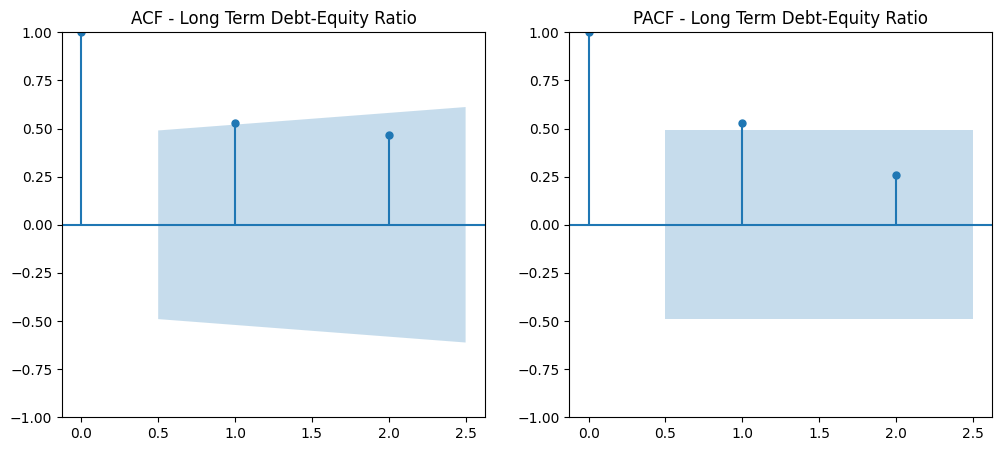

 ACF and PACF plots for 'Long Term Debt-Equity Ratio' to select p, d, q.



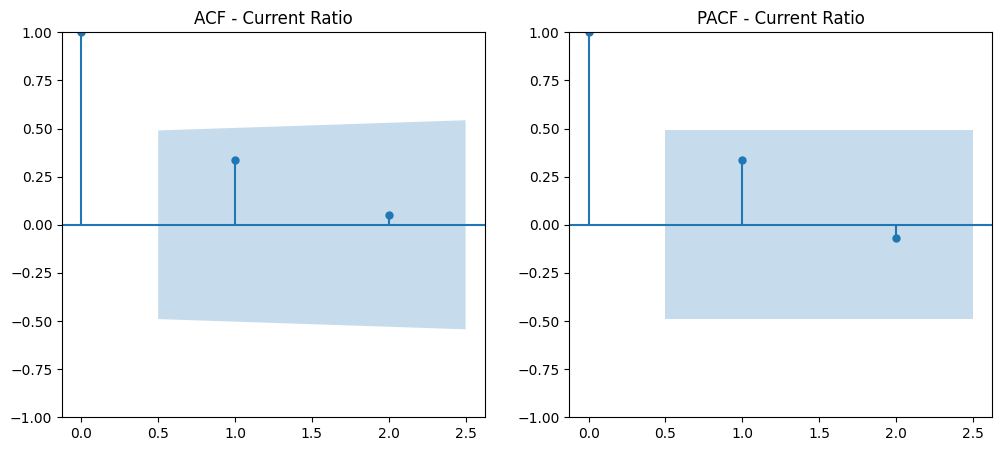

 ACF and PACF plots for 'Current Ratio' to select p, d, q.



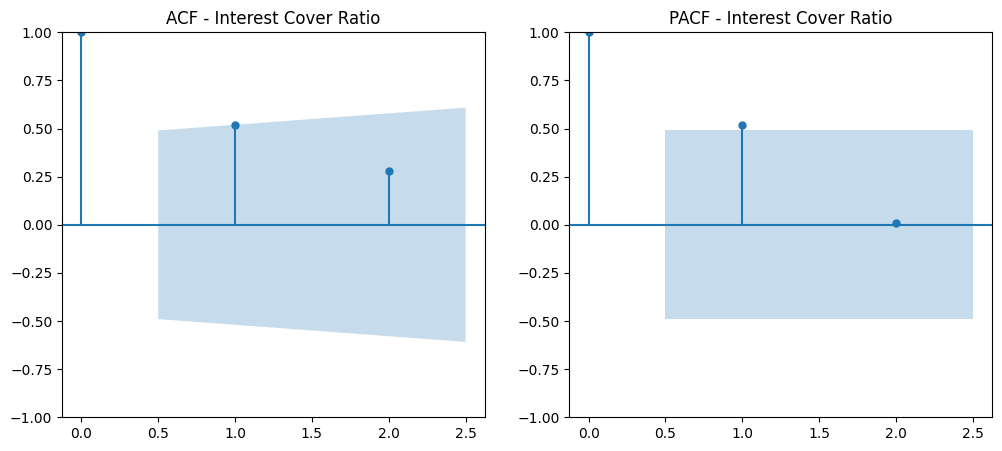

 ACF and PACF plots for 'Interest Cover Ratio' to select p, d, q.



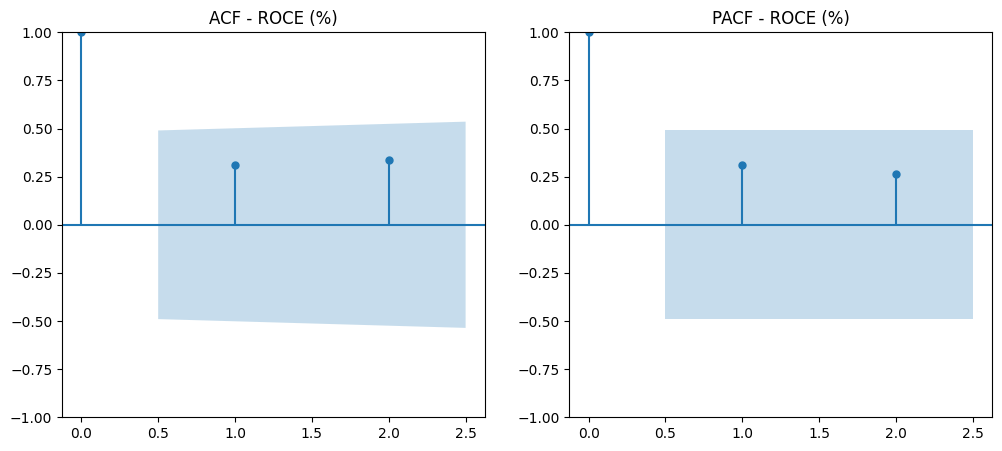

 ACF and PACF plots for 'ROCE (%)' to select p, d, q.



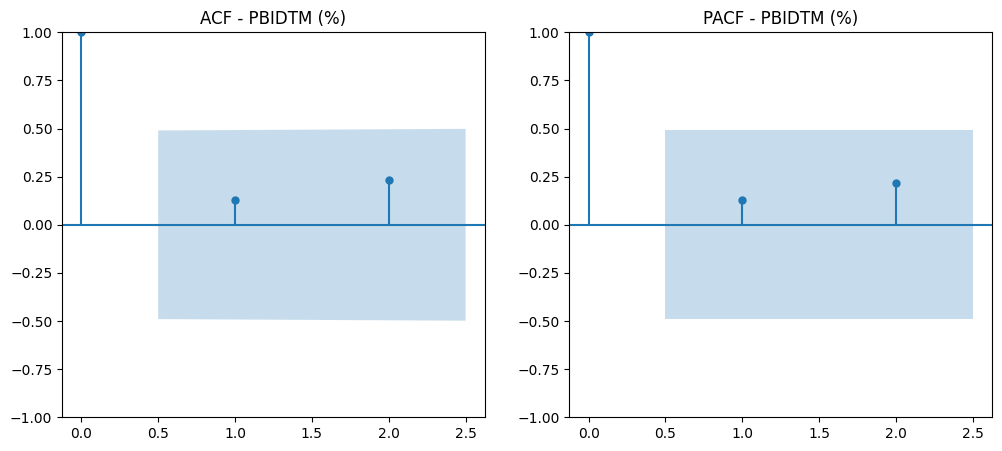

 ACF and PACF plots for 'PBIDTM (%)' to select p, d, q.



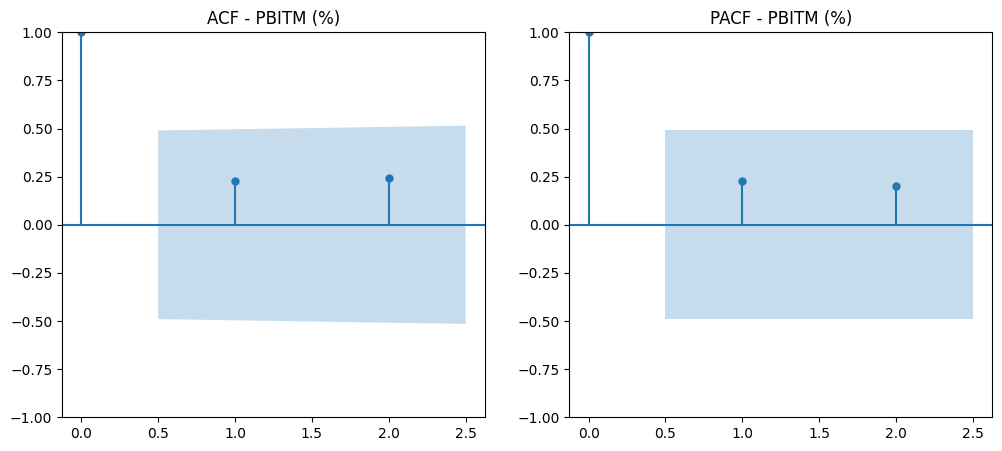

 ACF and PACF plots for 'PBITM (%)' to select p, d, q.



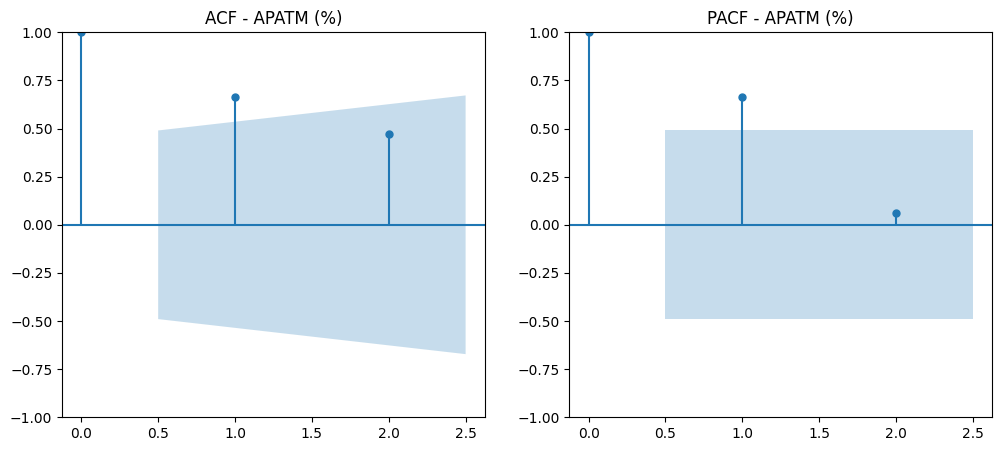

 ACF and PACF plots for 'APATM (%)' to select p, d, q.



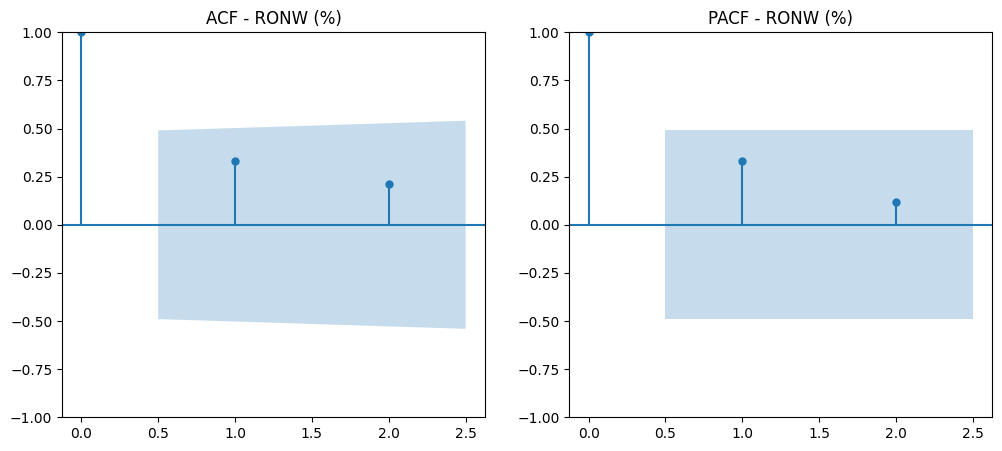

 ACF and PACF plots for 'RONW (%)' to select p, d, q.



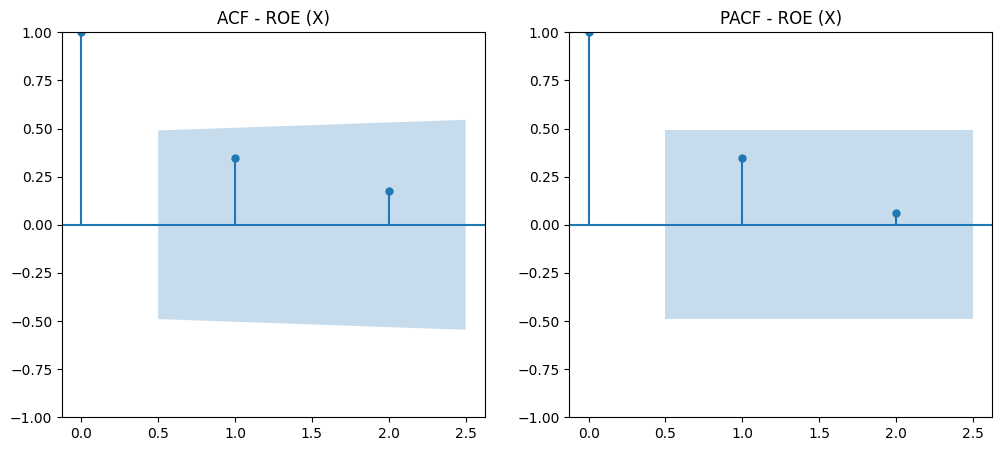

 ACF and PACF plots for 'ROE (X)' to select p, d, q.



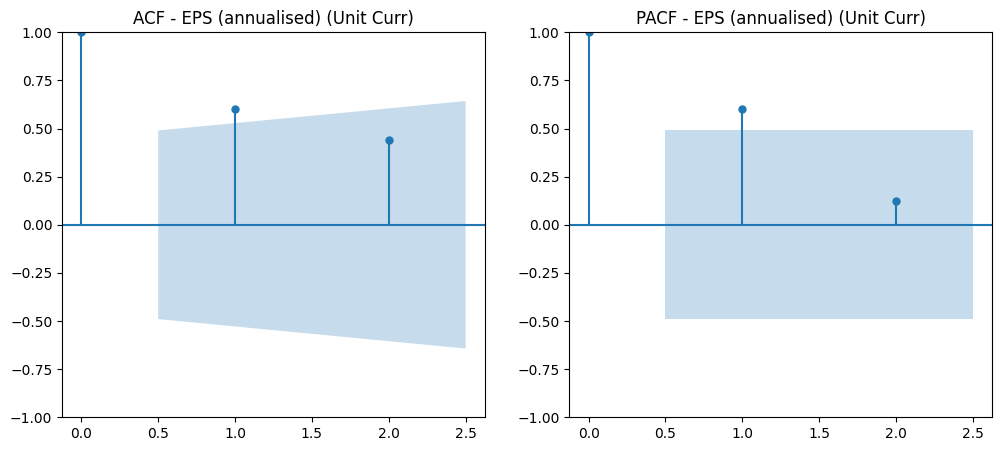

 ACF and PACF plots for 'EPS (annualised) (Unit Curr)' to select p, d, q.



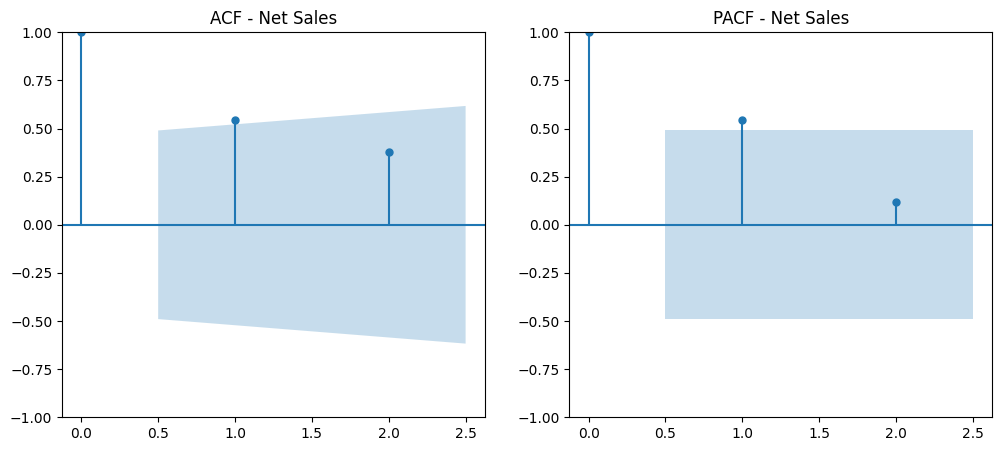

 ACF and PACF plots for 'Net Sales' to select p, d, q.



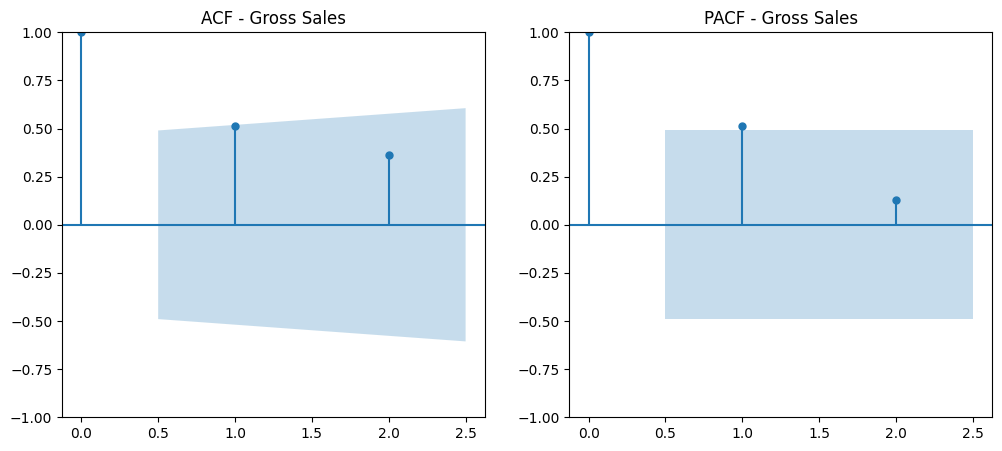

 ACF and PACF plots for 'Gross Sales' to select p, d, q.



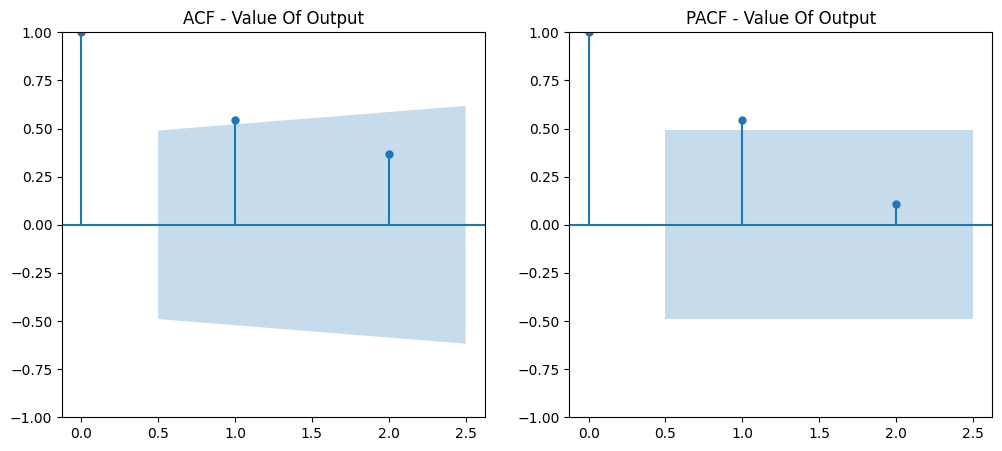

 ACF and PACF plots for 'Value Of Output' to select p, d, q.



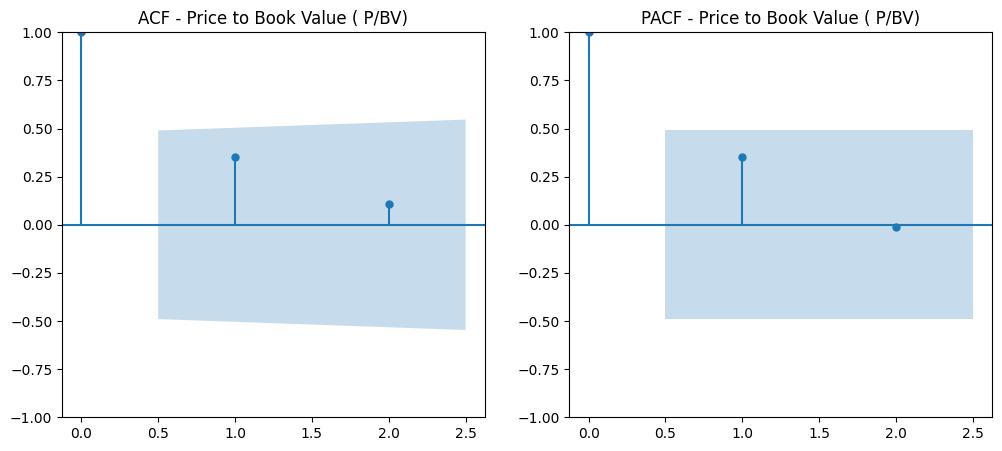

 ACF and PACF plots for 'Price to Book Value ( P/BV)' to select p, d, q.



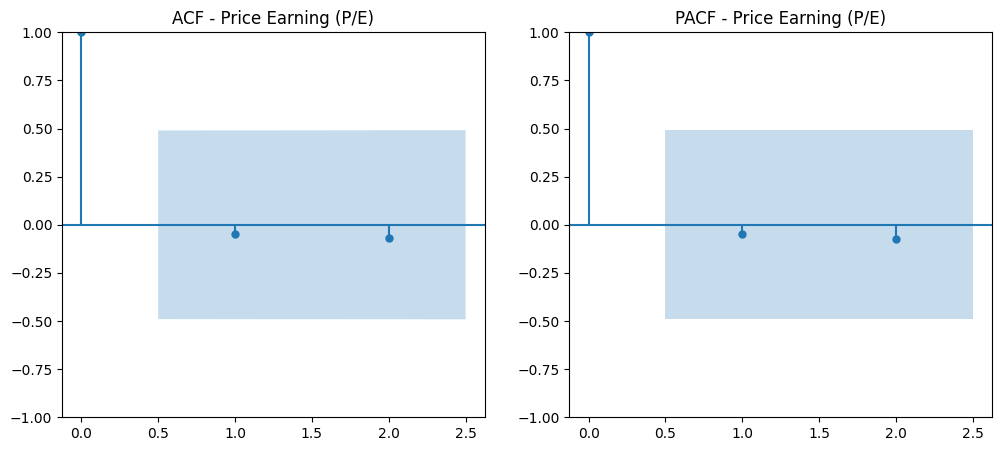

 ACF and PACF plots for 'Price Earning (P/E)' to select p, d, q.



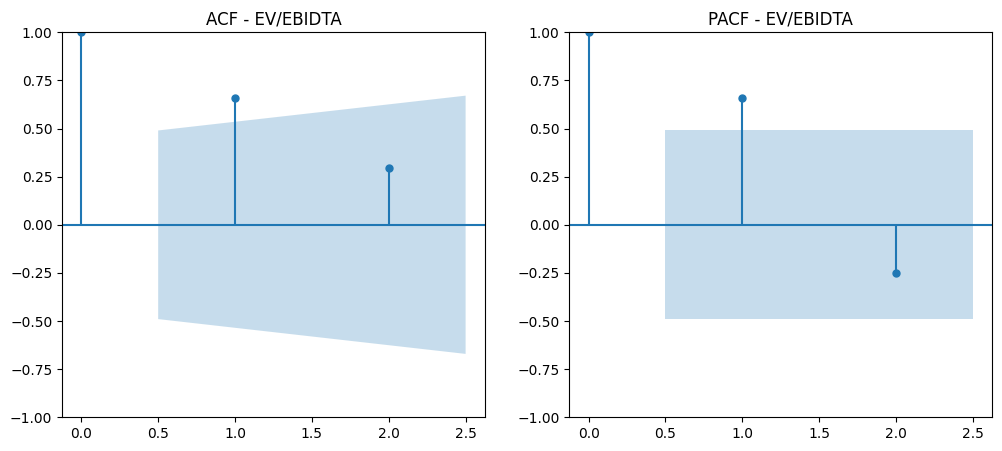

 ACF and PACF plots for 'EV/EBIDTA' to select p, d, q.



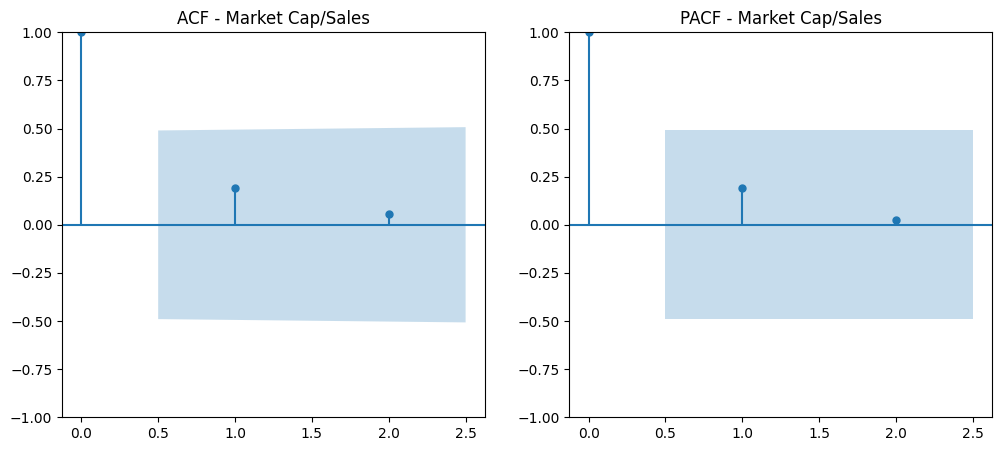

 ACF and PACF plots for 'Market Cap/Sales' to select p, d, q.



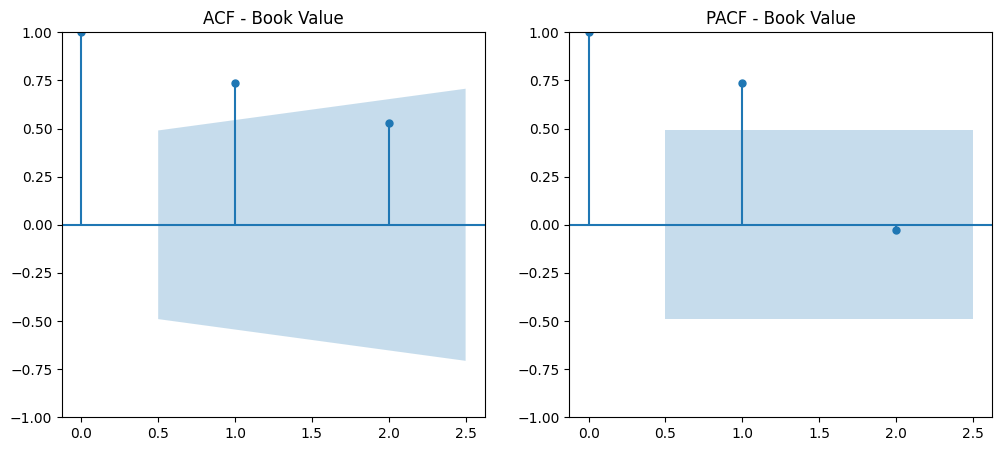

 ACF and PACF plots for 'Book Value' to select p, d, q.



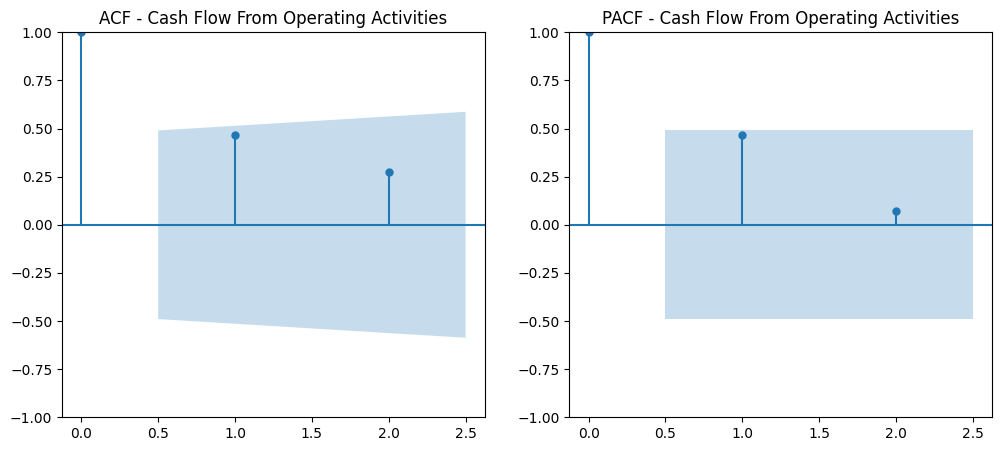

 ACF and PACF plots for 'Cash Flow From Operating Activities' to select p, d, q.



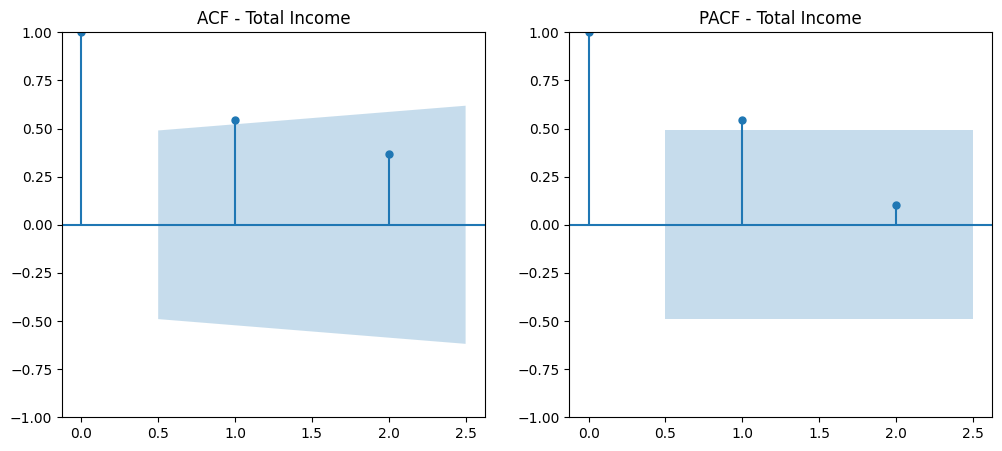

 ACF and PACF plots for 'Total Income' to select p, d, q.



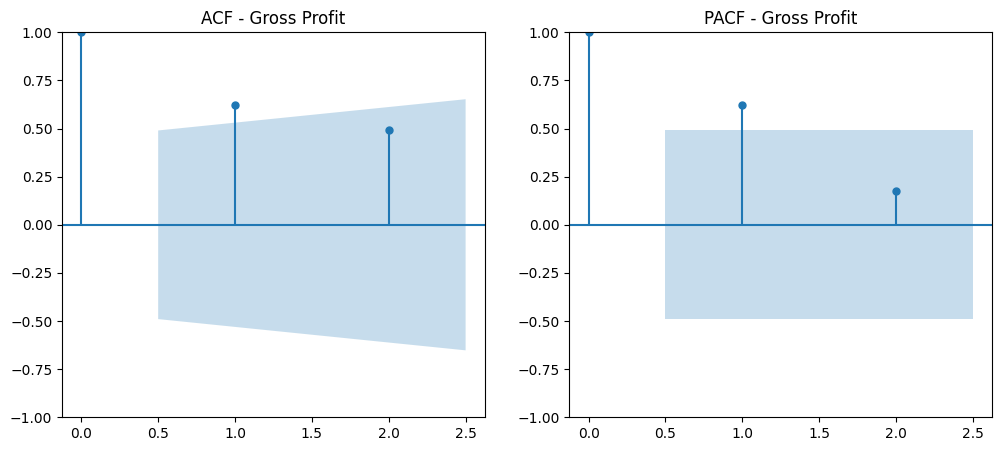

 ACF and PACF plots for 'Gross Profit' to select p, d, q.



In [ ]:
for column in target_columns:
    ts_data = company_data[['Year', column]].set_index('Year')[column].astype(float).dropna()

    if len(ts_data) < 3:
        print(f"Skipping {column}: Not enough data points for ACF/PACF analysis.")
        continue

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plot_acf(ts_data, lags=2, ax=plt.gca(), title=f"ACF - {column}")

    plt.subplot(1,2,2)
    plot_pacf(ts_data, lags=2, ax=plt.gca(), title=f"PACF - {column}")

    plt.show()
    print(f" ACF and PACF plots for '{column}' to select p, d, q.\n")

In [ ]:
from tqdm import tqdm  # Progress bar

def select_best_arima_order(ts_data):
    best_aic = np.inf
    best_order = (1, 1, 0) # Default

    # Expanded grid of reasonable values
    p_values = range(0, 5) # Increased max p
    d_values = range(0, 2)
    q_values = range(0, 5) # Increased max q

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(ts_data, order=(p, d, q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                except:
                    continue

    return best_order

In [ ]:
forecast_years = [2025, 2026, 2027]
forecast_results = {'Year': forecast_years}

print("\n🚀 Starting automated ARIMA forecasting process...\n")

for column in tqdm(target_columns):
    try:
        # Use all years of data up to 2024 for forecasting
        ts_data = all_years_up_to_2024[['Year', column]].set_index('Year')[column].astype(float).dropna()

        if len(ts_data) < 3:
            raise ValueError("Not enough data points for reliable forecasting.")

        best_order = select_best_arima_order(ts_data)

        model = ARIMA(ts_data, order=best_order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=3)

        forecast_results[column] = forecast.values.tolist()

    except Exception as e:
        print(f"⚠️ Skipping '{column}': {e}")
        forecast_results[column] = [np.nan, np.nan, np.nan]

forecast_df = pd.DataFrame(forecast_results)
forecast_df.to_csv('forecasted_financial_ratios.csv', index=False)

print("\n✅ Forecast saved as 'forecasted_financial_ratios.csv'.")


🚀 Starting automated ARIMA forecasting process...



100%|██████████| 23/23 [03:17<00:00,  8.60s/it]


✅ Forecast saved as 'forecasted_financial_ratios.csv'.


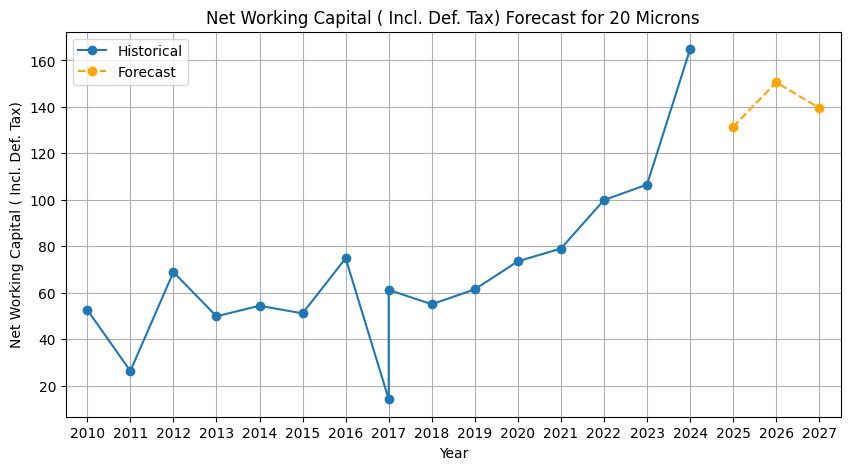

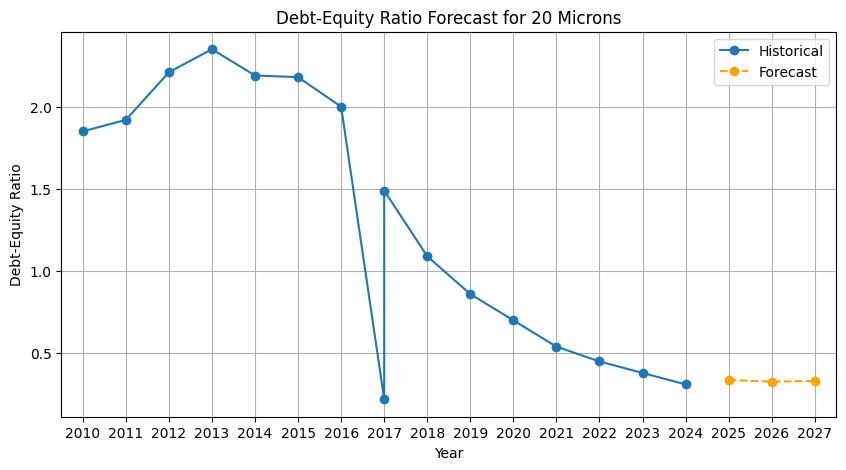

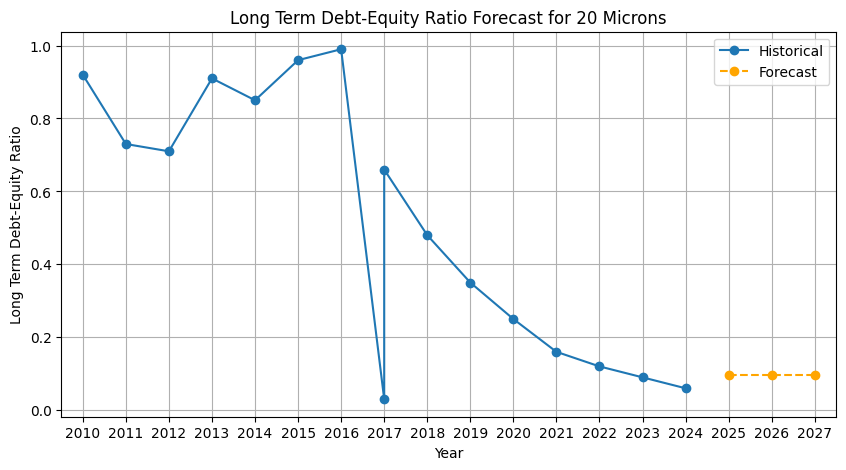

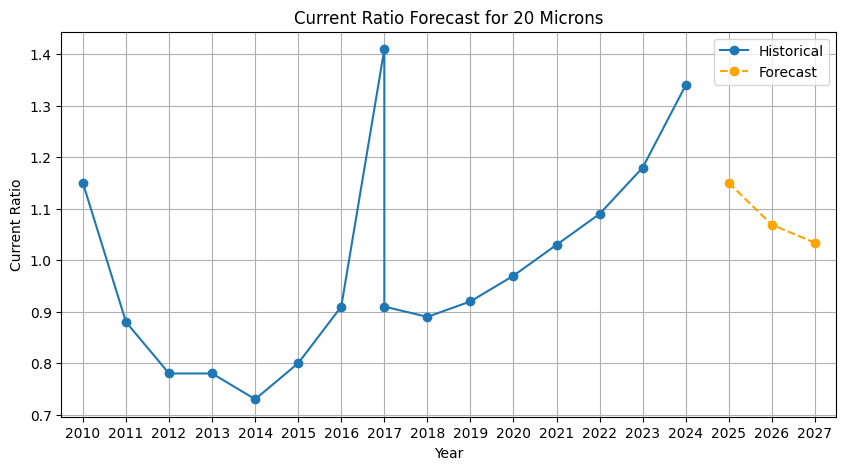

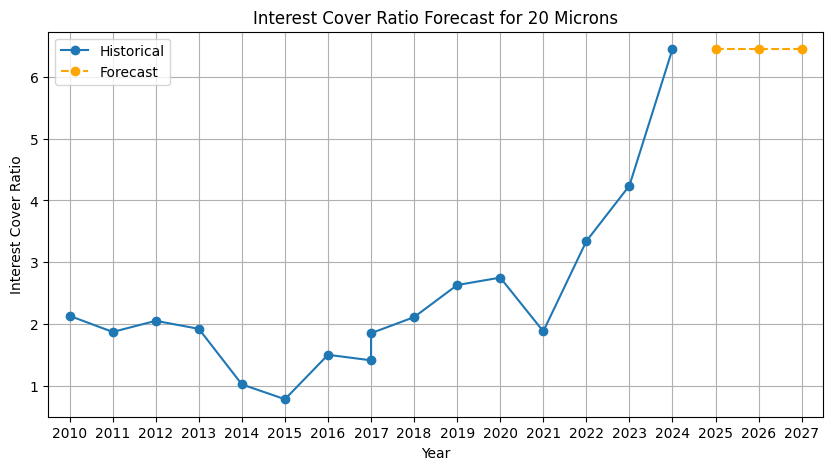

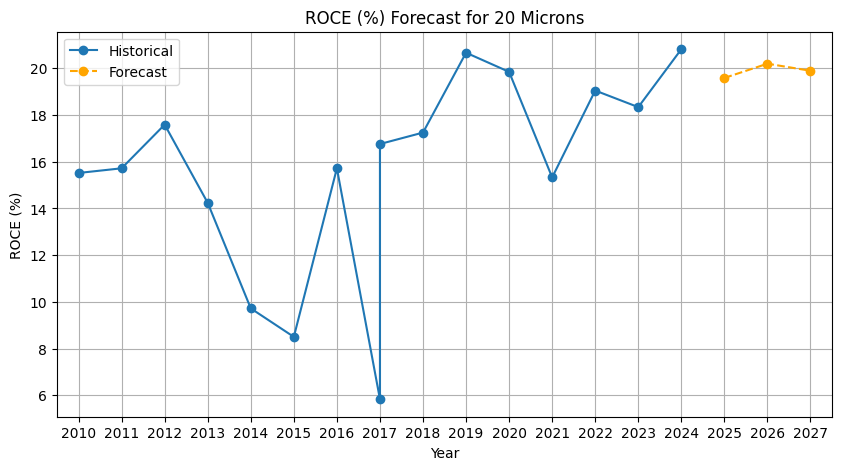

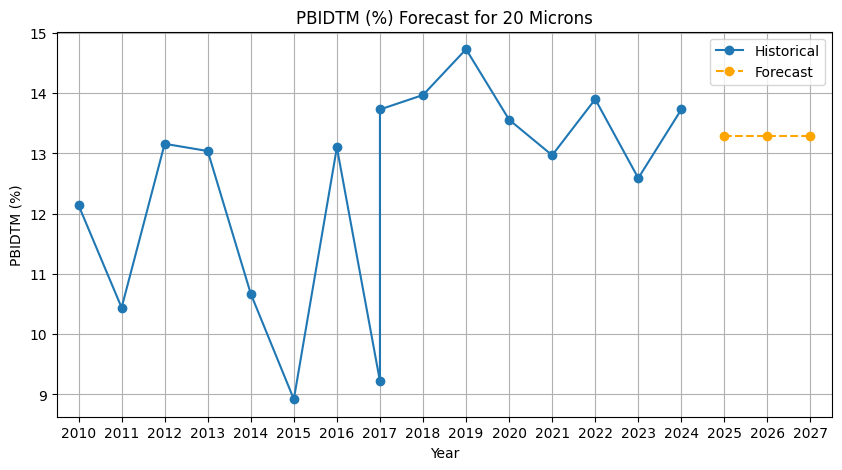

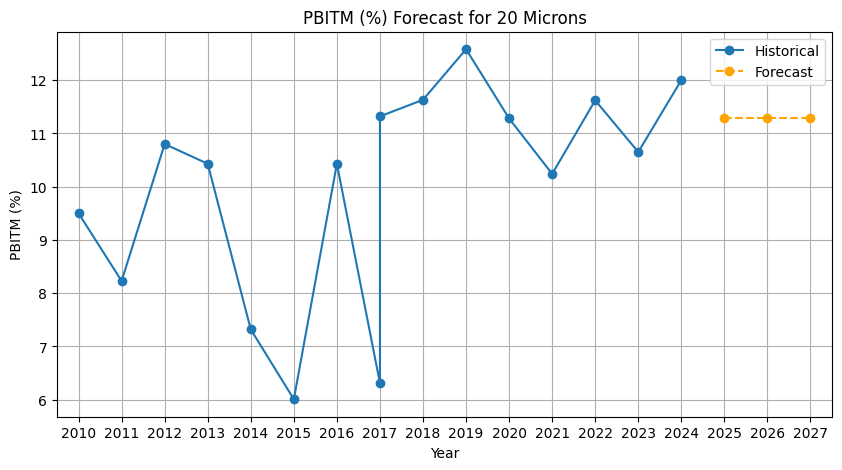

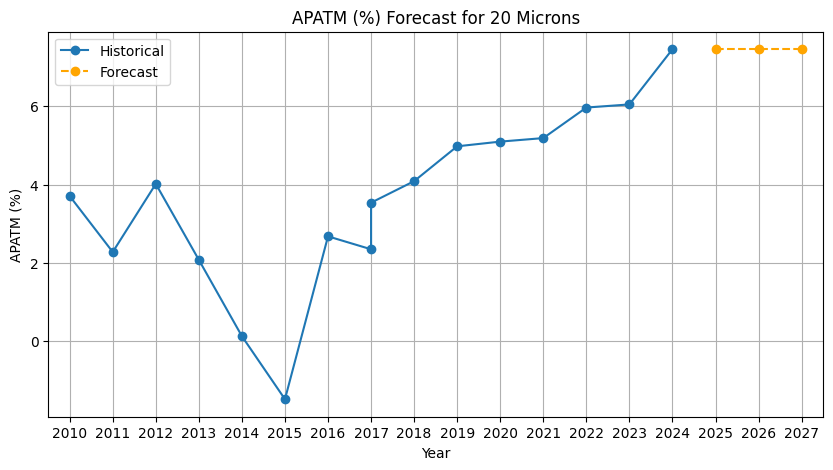

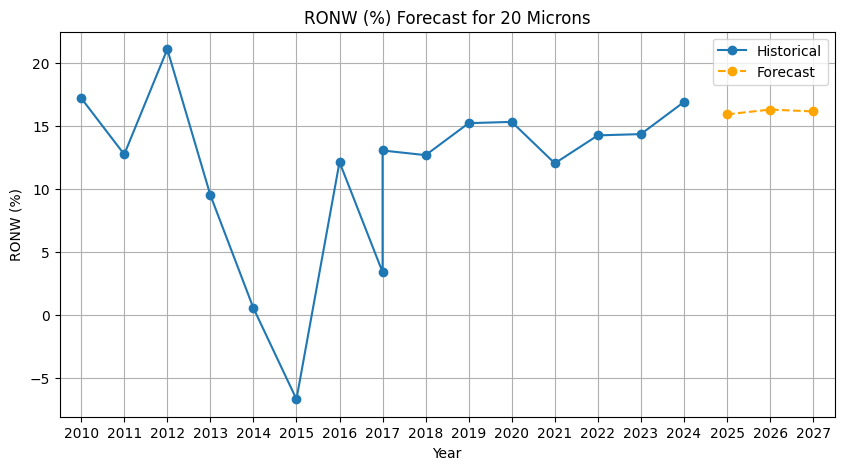

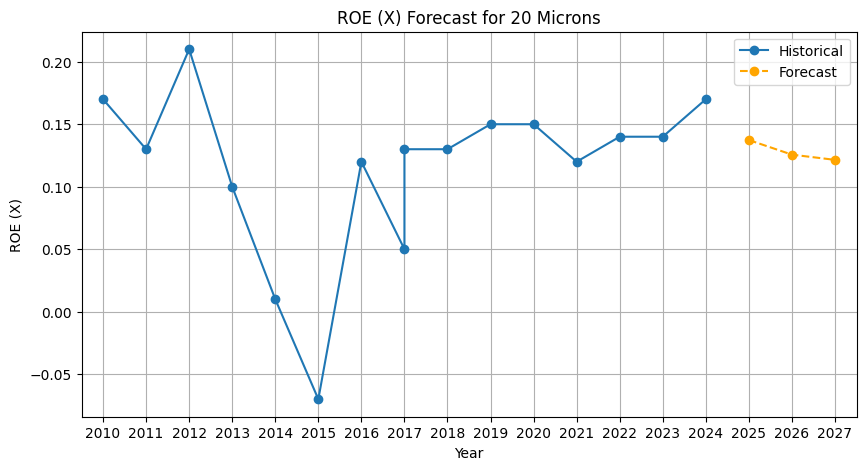

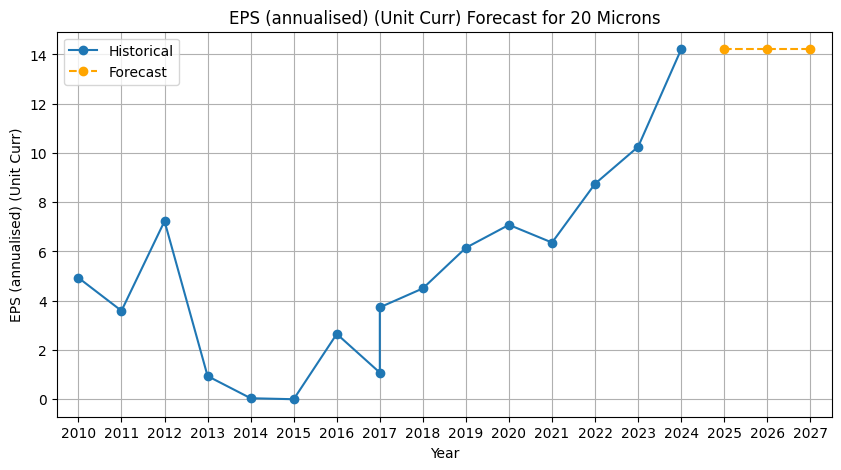

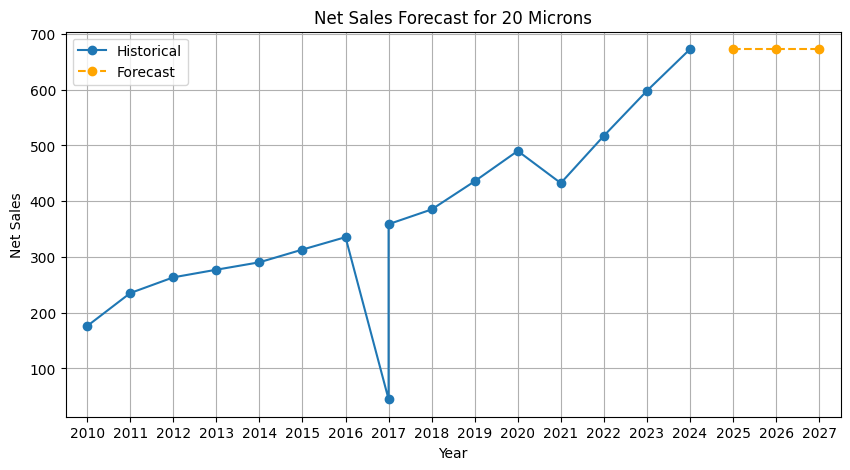

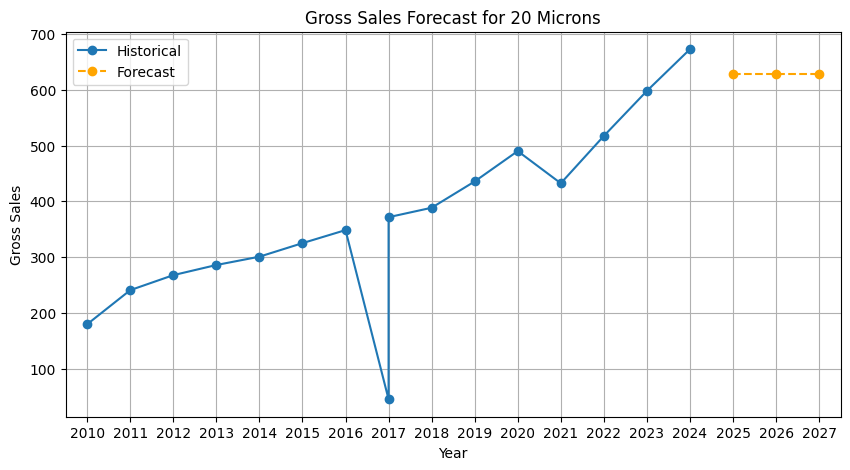

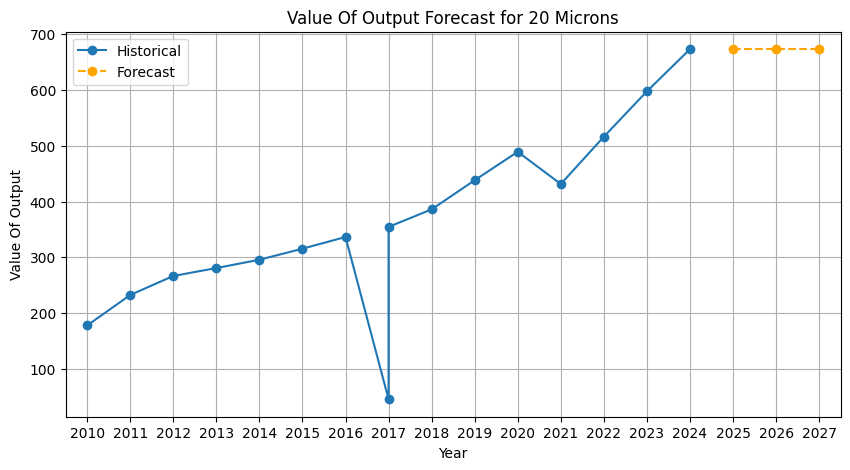

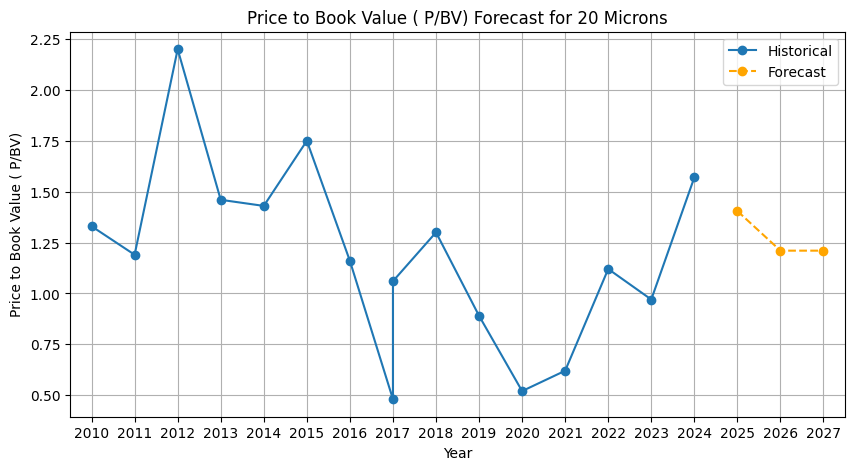

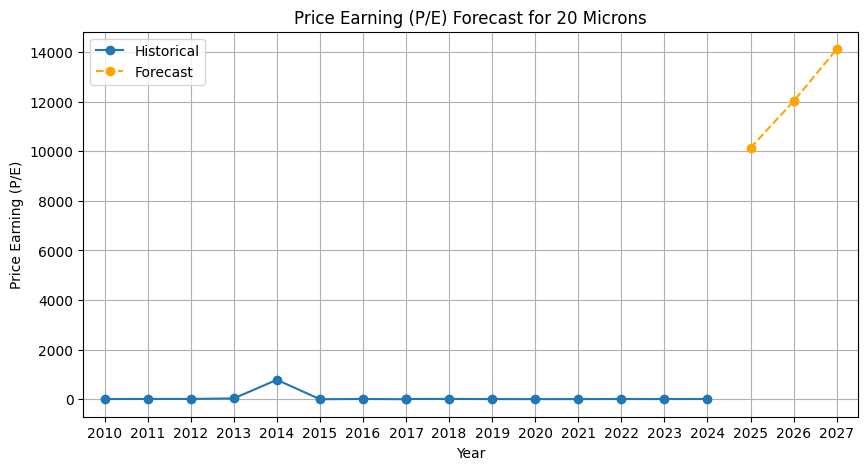

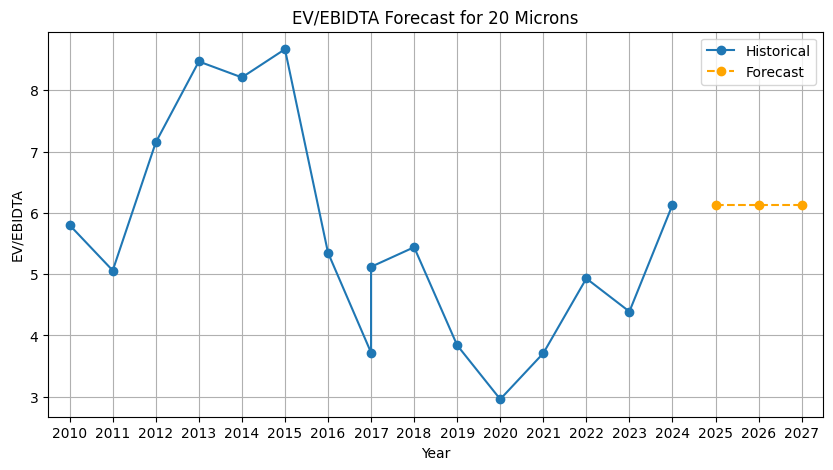

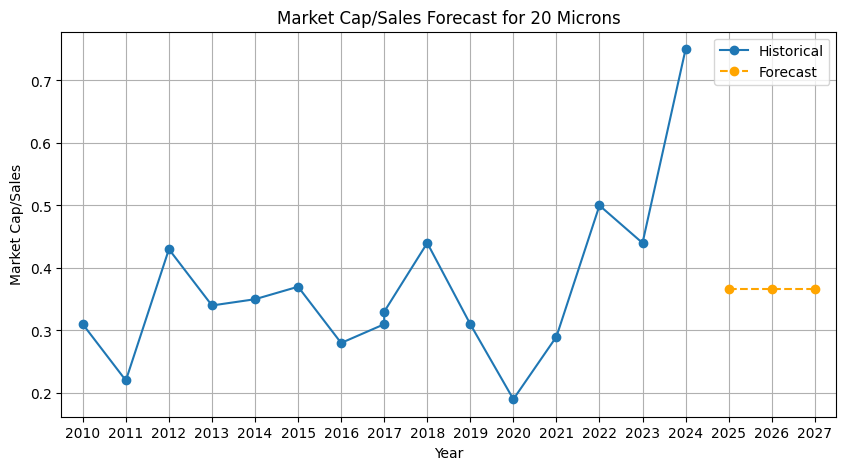

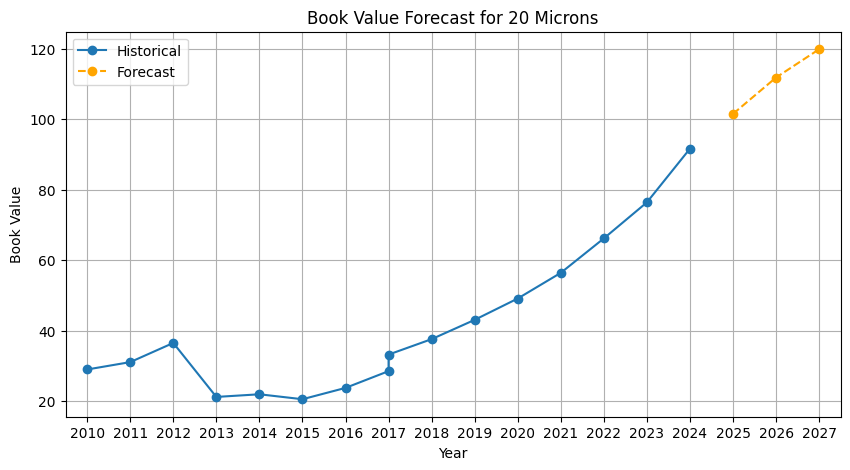

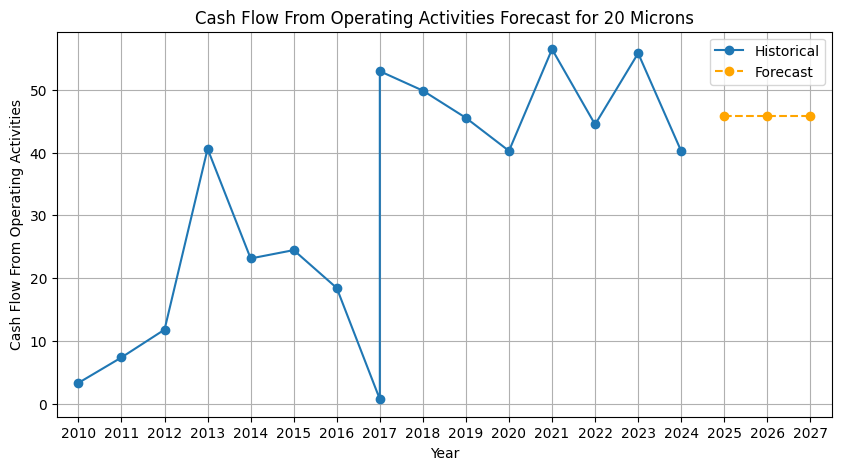

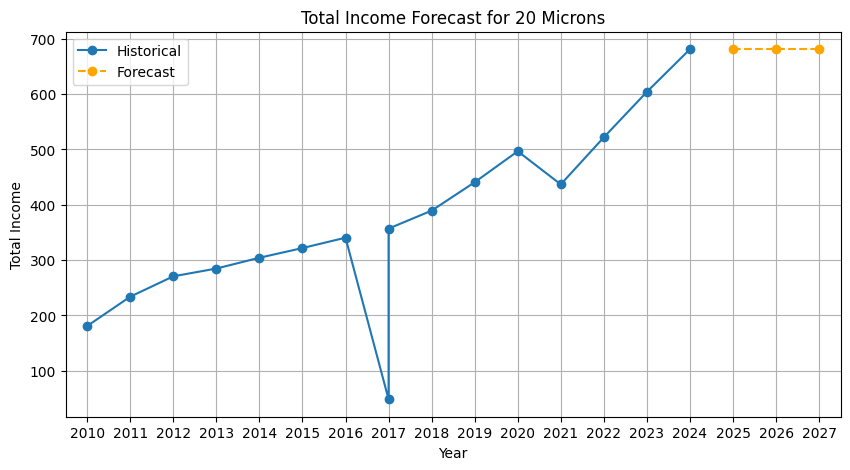

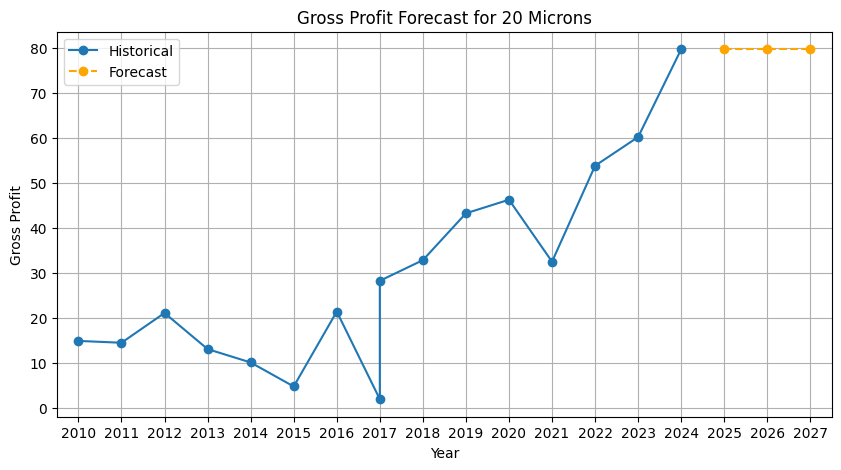

In [ ]:
for column in target_columns:
    plt.figure(figsize=(10, 5))

    # Use all years of data up to 2024 for plotting historical data
    historical = all_years_up_to_2024[['Year', column]].dropna()
    plt.plot(historical['Year'], historical[column], marker='o', label='Historical')

    # Ensure forecast_df is available and has the correct years
    if 'forecast_df' in locals() and not forecast_df.empty:
        forecast_data = forecast_df[['Year', column]].dropna()
        plt.plot(forecast_data['Year'], forecast_data[column], marker='o', linestyle='--', color='orange', label='Forecast')

    plt.title(f'{column} Forecast for {company_name}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)

    # Set x-axis ticks to include all historical years up to 2024 and forecast years
    all_years = sorted(list(historical['Year'].unique()) + [2025, 2026, 2027])
    plt.xticks(all_years)
    plt.xlim([min(all_years) - 0.5, max(all_years) + 0.5]) # Add a small buffer to the limits

    plt.show()

In [ ]:
# Select data for years 2025, 2026, and 2027
predicted_years_df = forecast_df[forecast_df['Year'].isin([2025, 2026, 2027])]

# Set 'Year' as index and transpose for vertical display
predicted_years_vertical = predicted_years_df.set_index('Year').T

print(f"\nPredicted Financial Data for 2025, 2026, and 2027 {company_name}:")
display(predicted_years_vertical)


Predicted Financial Data for 2025, 2026, and 2027 20 Microns:


Year,2025,2026,2027
Net Working Capital ( Incl. Def. Tax),131.397327,150.579473,139.573631
Debt-Equity Ratio,0.338027,0.326805,0.331298
Long Term Debt-Equity Ratio,0.096967,0.096967,0.096967
Current Ratio,1.150268,1.068920,1.034043
Interest Cover Ratio,6.450000,6.450000,6.450000
ROCE (%),19.589458,20.200036,19.897076
PBIDTM (%),13.296764,13.296764,13.296764
PBITM (%),11.287742,11.287742,11.287742
APATM (%),7.460000,7.460000,7.460000
RONW (%),15.941173,16.316899,16.172675


In [ ]:
train_data = ts_data[ts_data.index <= 2021]
test_data = ts_data[ts_data.index >= 2022]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

best_order = select_best_arima_order(train_data)  # Or predefined (p,d,q)
model = ARIMA(train_data, order=best_order)
model_fit = model.fit()



In [ ]:
forecast = model_fit.forecast(steps=len(test_data))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 27.4155
MSE: 881.4480
RMSE: 29.6892


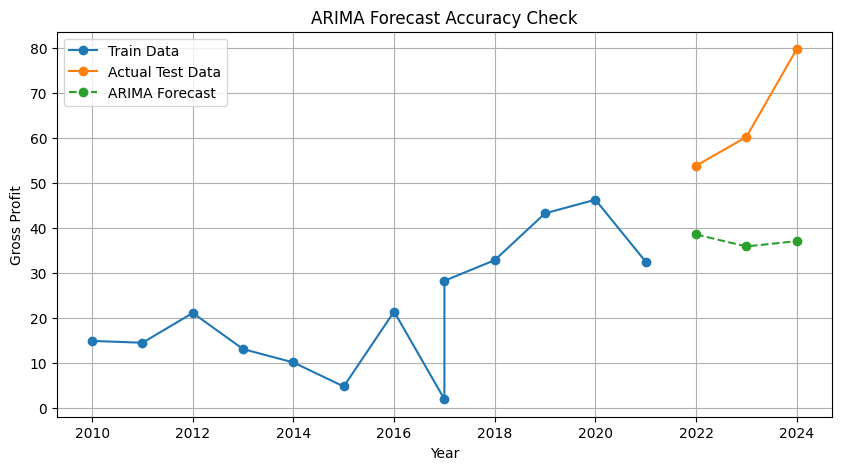

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data.values, label='Train Data', marker='o')
plt.plot(test_data.index, test_data.values, label='Actual Test Data', marker='o')
plt.plot(test_data.index, forecast.values, label='ARIMA Forecast', marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel(column)
plt.legend()
plt.grid(True)
plt.title('ARIMA Forecast Accuracy Check')
plt.show()
